# GPU and RAM

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Feb  4 13:15:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Setup

In [ ]:
# !gdown --id '1f0P7toIVy-fTJoMUzNDY3XsiDycqG9BG'
# !gdown --id '1dTcyghOFrUjnSY0RmrAHAJDVwve1dj3D'
# !gdown --id '1IzzM8l63VfOXjcv9LMIGrTwrgmkAIoXI'
# !gdown --id '1p2v2zJuK0z-17itvFUBV-QEr5x-0CDlV'
!gdown --id '1f-PkHBfve_Zxy_l2cEa9bHwHjKPf1rfm'
# !gdown --id '1TOkbDnCrRnmpqnOTxaan0Dw7yor3RqBF'

Downloading...
From: https://drive.google.com/uc?id=1f-PkHBfve_Zxy_l2cEa9bHwHjKPf1rfm
To: /content/K_Fold_1_trainfile.csv
100% 207M/207M [00:02<00:00, 70.5MB/s]


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 82.3 MB/s 
     |████████████████████████████████| 895 kB 86.3 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 6.8 MB 87.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset 1

In [ ]:
df = pd.read_excel('/content/Agency_Text_Status_SortedDate.csv.xlsx')
df

,number,text,status
0,INC13447112,reset passphrase unlock account gateway apss l...,1
1,INC13447182,contact assistance question eagent correcting ...,1
2,INC13447211,enterprise agency alr adr duplicate incident c...,1
3,INC13447385,agency gateway office allstate outlook account...,1
4,INC13447354,update vip credential purchased new phone need...,1
...,...,...,...
493498,INC15443965,agency chat response client issue known policy...,1
493499,INC15443166,reset passphrase aia allstate independent agen...,1
493500,INC15445405,check status request update ticket agent incid...,1
493501,INC15445697,unable bind application due prior balance alls...,1


In [ ]:
df_train, df_test = train_test_split(
    df,
    test_size=0.33,
    random_state=48
)

df_train.shape, df_test.shape

((330647, 3), (162856, 3))

In [ ]:
df2 = pd.read_excel('/content/Customer_Text_Status_SortedDate.xlsx')
df2 = df2[df2.status == 0]
df2

,number,text,status
8178,INC14329468,receiving password reset e mail needing reset ...,0
8188,INC14329514,receiving password reset e mail never received...,0
14345,INC14334357,receiving password reset e mail customer say r...,0
18819,INC14071398,unable access outlook due error security reaso...,0
18988,INC14071820,unable access outlook due error security reaso...,0
...,...,...,...
215406,INC15432908,unable sign myaccount website mobile app custo...,0
215459,INC15433994,unable sign myaccount website mobile app custo...,0
215488,INC15433242,unable sign myaccount website mobile app unabl...,0
215669,INC15432961,unable sign myaccount website mobile app unabl...,0


In [ ]:
df3 = pd.read_excel('/content/Employee_Text_Status_SortedDate.xlsx')
df3 = df3[df3.status == 0]
df3

,number,text,status
85,INC13575044,lepnt c wireless network unavailable showing l...,0
121,INC13575117,auto policies alliance endorsement failure veh...,0
497,INC13817006,unable open myecc application ios device myecc...,0
2294,INC14045608,sporadic servicenow myatsc portal performance ...,0
2355,INC14188817,unable login finesse due error device accessib...,0
...,...,...,...
244199,INC15433607,multiple application unable search slow respon...,0
244221,INC15433254,multiple application eperiencing slow response...,0
244244,INC15133210,receiving file note could created due connecti...,0
244311,INC15133176,receiving application error clicking supportin...,0


In [ ]:
df = pd.concat([df_train, df2, df3])
df

,number,text,status
455891,INC15285735,advisor pro unable complete cross inde policy ...,1
489357,INC15429412,complete pended bound application alliance pen...,1
453809,INC15270772,alliance open blank screen launching alliance ...,1
471059,INC15355507,unable sign document life sales central lsc us...,1
136257,INC13951127,unable login centrevu management system cms lo...,1
...,...,...,...
244199,INC15433607,multiple application unable search slow respon...,0
244221,INC15433254,multiple application eperiencing slow response...,0
244244,INC15133210,receiving file note could created due connecti...,0
244311,INC15133176,receiving application error clicking supportin...,0


In [ ]:
df.to_excel('dataset1_train.xlsx')
df_test.to_excel('dataset1_test.xlsx')

# Dataset 2

In [ ]:
df = pd.read_excel('/content/Customer_Text_Status_SortedDate.xlsx')
df_train, df_test = train_test_split(
    df,
    test_size=0.33,
    random_state=48
)
df2 = pd.read_excel('/content/Agency_Text_Status_SortedDate.csv.xlsx')
df2 = df2[df2.status == 0]
df3 = pd.read_excel('/content/Employee_Text_Status_SortedDate.xlsx')
df3 = df3[df3.status == 0]
df = pd.concat([df_train, df2, df3])
df.to_excel('dataset2_train.xlsx')
df_test.to_excel('dataset2_test.xlsx')

# Dataset 3

In [ ]:
df = pd.read_excel('/content/Employee_Text_Status_SortedDate.xlsx')
df_train, df_test = train_test_split(
    df,
    test_size=0.33,
    random_state=48
)
df2 = pd.read_excel('/content/Agency_Text_Status_SortedDate.csv.xlsx')
df2 = df2[df2.status == 0]
df3 = pd.read_excel('/content/Customer_Text_Status_SortedDate.xlsx')
df3 = df3[df3.status == 0]
df = pd.concat([df_train, df2, df3])
df.to_excel('dataset3_train.xlsx')
df_test.to_excel('dataset3_test.xlsx')

# Bert

## Data

In [ ]:
import transformers
from transformers import AdamW, get_linear_schedule_with_warmup
# from transformers import BertModel, BertTokenizer
# from transformers import RobertaTokenizer, RobertaModel
from transformers import AutoTokenizer, AutoModel
# from transformers import XLNetModel, XLNetTokenizer
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!gdown --id '1f0P7toIVy-fTJoMUzNDY3XsiDycqG9BG'

Downloading...
From: https://drive.google.com/uc?id=1f0P7toIVy-fTJoMUzNDY3XsiDycqG9BG
To: /content/Agency_Text_Status_SortedDate.csv.xlsx
100% 22.0M/22.0M [00:00<00:00, 54.3MB/s]


In [ ]:
# !gdown --id '1hQOwV2PuAL6aTuQWr8ajMYefj5MVPZlu'
# !gdown --id '1jEnjwT1lSbR4OloAy6IFCLFa1ADBCG2B'
# !gdown --id '1ImwvyEv9slcGD-YQ3Vp0QhjEdl9EmhWb'
# !gdown --id '13Ra5qJwduTiHgtadIfPqI5HtIfPf4Dvh'

In [ ]:
df = pd.read_csv('/content/K_Fold_1_trainfile.csv')
# df_train = pd.read_excel('/content/dataset2_train.xlsx')
# df_test = pd.read_excel('/content/dataset2_test.xlsx')
# df = pd.concat([df_train, df_test])
# df = pd.read_csv('/content/ireland_aug_large.csv')

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['status'] = label_encoder.fit_transform(df['status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


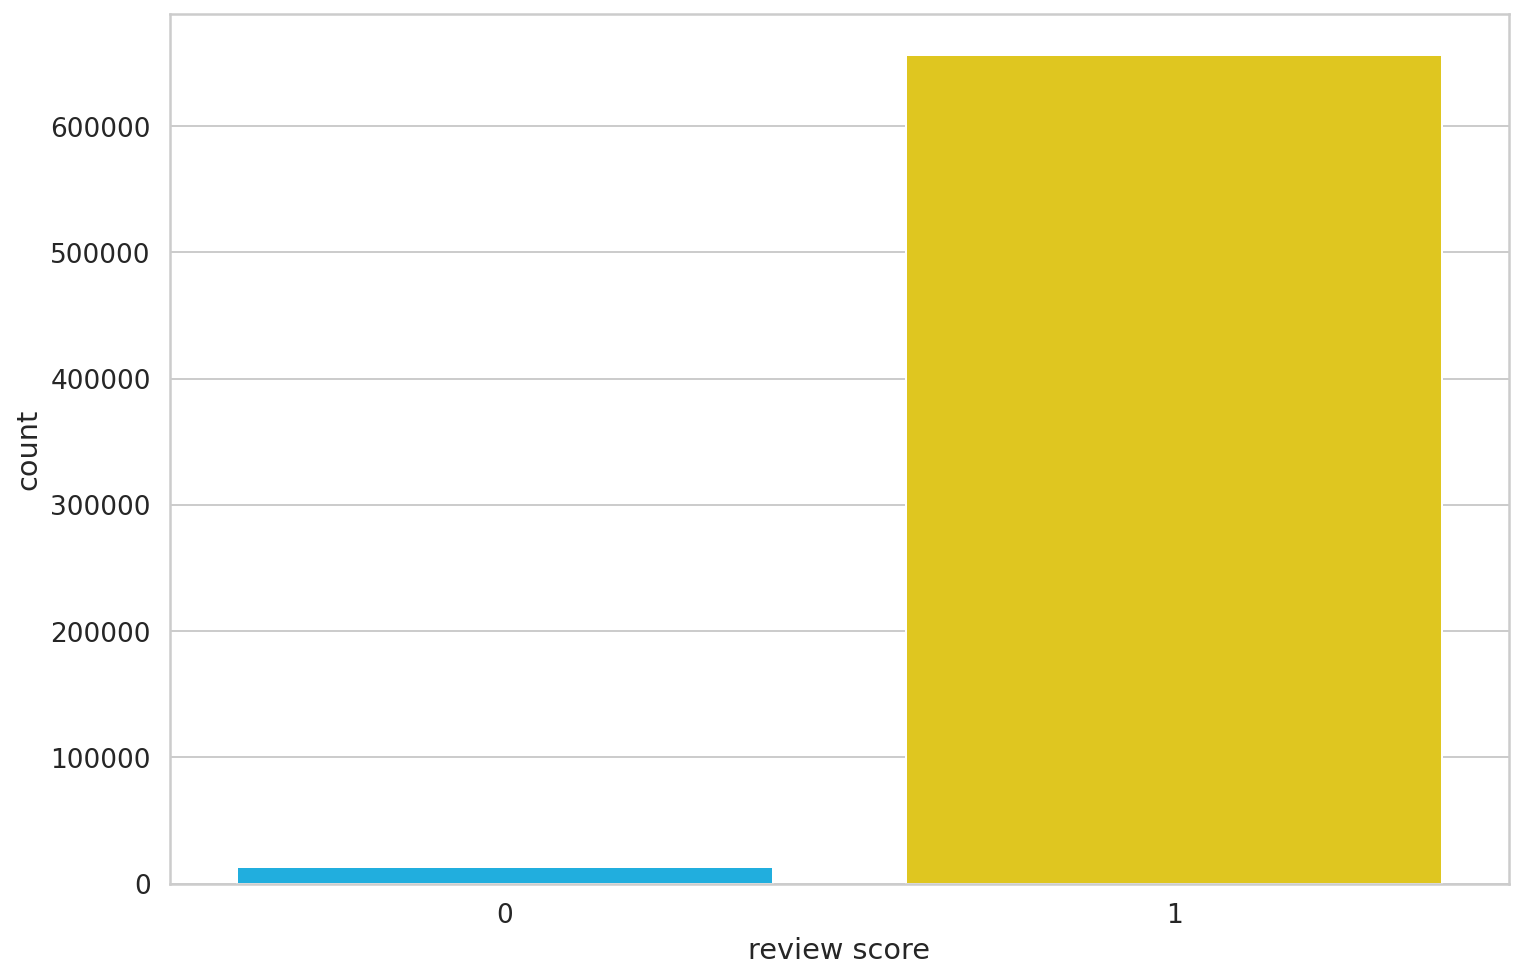

In [ ]:
sns.countplot(df.status)
plt.xlabel('review score');

In [ ]:
df.status.value_counts()

1    656258
0     13470
Name: status, dtype: int64

In [ ]:
# PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
# PRE_TRAINED_MODEL_NAME = 'roberta-base'
# PRE_TRAINED_MODEL_NAME = 'xlnet-base-cased'
PRE_TRAINED_MODEL_NAME = 'nghuyong/ernie-2.0-en'
# tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
# tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
# tokenizer = XLNetTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
sample_txt = 'Did this work? I think it worked'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

 Sentence: Did this work? I think it worked
   Tokens: ['did', 'this', 'work', '?', 'i', 'think', 'it', 'worked']
Token IDs: [2106, 2023, 2147, 1029, 1045, 2228, 2009, 2499]


In [ ]:
print(tokenizer.sep_token, tokenizer.sep_token_id)
# marks ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id)
# at start of the sentence so BERT knows we are doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id)
# token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id)
# BERT understands tokens that were in the training set. Everything else in unknown

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [ ]:
encoding = tokenizer.encode_plus(
    sample_txt,
    max_length=130,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


dict_keys(['input_ids', 'attention_mask'])

In [ ]:
# print(len(encoding['input_ids'][0]))
# encoding['input_ids'][0]

In [ ]:
# print(len(encoding['attention_mask'][0]))
# encoding['attention_mask']

In [ ]:
# tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

In [ ]:
# token_lens = []

# for txt in df.text:
#     tokens = tokenizer.encode(txt, max_length=512)
#     token_lens.append(len(tokens))

# sns.distplot(token_lens)
# plt.xlim([0, 256]);
# plt.xlabel('Token count');

In [ ]:
MAX_LEN = 25

In [ ]:
class DatasetLoader(Dataset):
    def __init__(self, text, targets, tokenizer, max_len):
        self.text = text
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.text)
        
    def __getitem__(self, item):
        text = str(self.text[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
        )
        return {
        'text': text,
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
df_train, df_test = train_test_split(
    df,
    test_size=0.33,
    random_state=RANDOM_SEED
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.5,
    random_state=RANDOM_SEED
)

df_train.shape, df_val.shape, df_test.shape

((448717, 10), (110505, 10), (110506, 10))

In [ ]:
df_train.status.value_counts()

1    439616
0      9101
Name: status, dtype: int64

In [ ]:
# x = df_train[df_train.status == 1]
# x[:50000]
# x = pd.concat([x, df_train[df_train.status == 0]])
# df_train = x.sample(frac=1).reset_index(drop=True)
# df_train

In [ ]:
# df_train = pd.concat([df_train, df_val])

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# splits = []
# for train_idx, test_idx in kfolds.split(df_train['text'], df_train['status']):
#     splits.append((train_idx, test_idx))
# df_train=splits[0]
# df_val=splits[1]

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = DatasetLoader(
        text=df.text.to_numpy(),
        targets=df.status.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(
        ds,
        batch_size=batch_size
    )

BATCH_SIZE = 32
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([32, 25])
torch.Size([32, 25])
torch.Size([32])


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## Model

In [ ]:
# bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
# bert_model = RobertaModel.from_pretrained(PRE_TRAINED_MODEL_NAME) 
# bert_model = XLNetModel.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=2) 

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at nghuyong/ernie-2.0-en were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
output = bert_model(
  input_ids=data['input_ids'],
  attention_mask=data['attention_mask']
)

last_hidden_state = output[0]
pooled_output = output[1]

In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        # self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        self.bert = bert_model
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
        )
        pooled_output = output[1]
        output = self.drop(pooled_output)
        return self.out(output)
class_names = ['0', '1']
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([32, 25])
torch.Size([32, 25])


In [ ]:
input_ids[0]

tensor([ 101, 9362, 5310, 2035, 9153, 2618, 8619, 4013, 5310, 3277, 3229, 2075,
        9779, 2361, 2349, 7561, 4760, 3229, 6380, 9362, 5310, 2035, 9153, 2618,
         102], device='cuda:0')

In [ ]:
EPOCHS = 3
total_steps = len(train_data_loader) * EPOCHS

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
loss_fn = nn.CrossEntropyLoss().to(device)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
def train_epoch(
    model,
    data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            
            loss = loss_fn(outputs, targets)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    print(f'Val   loss {val_loss} accuracy {val_acc}')

    print()
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss) 
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.pt')
        best_accuracy = val_acc

Epoch 1/3
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Train loss 0.08402767982859564 accuracy 0.9832789932184428
Val   loss 0.0675463403915403 accuracy 0.9802542871363287

Epoch 2/3
----------
Train loss 0.0622262914393676 accuracy 0.9885874615849188
Val   loss 0.05972959370863018 accuracy 0.9891136147685625

Epoch 3/3
----------
Train loss 0.058368723281910034 accuracy 0.9895167778354732
Val   loss 0.05889198801911112 accuracy 0.9893307995113344



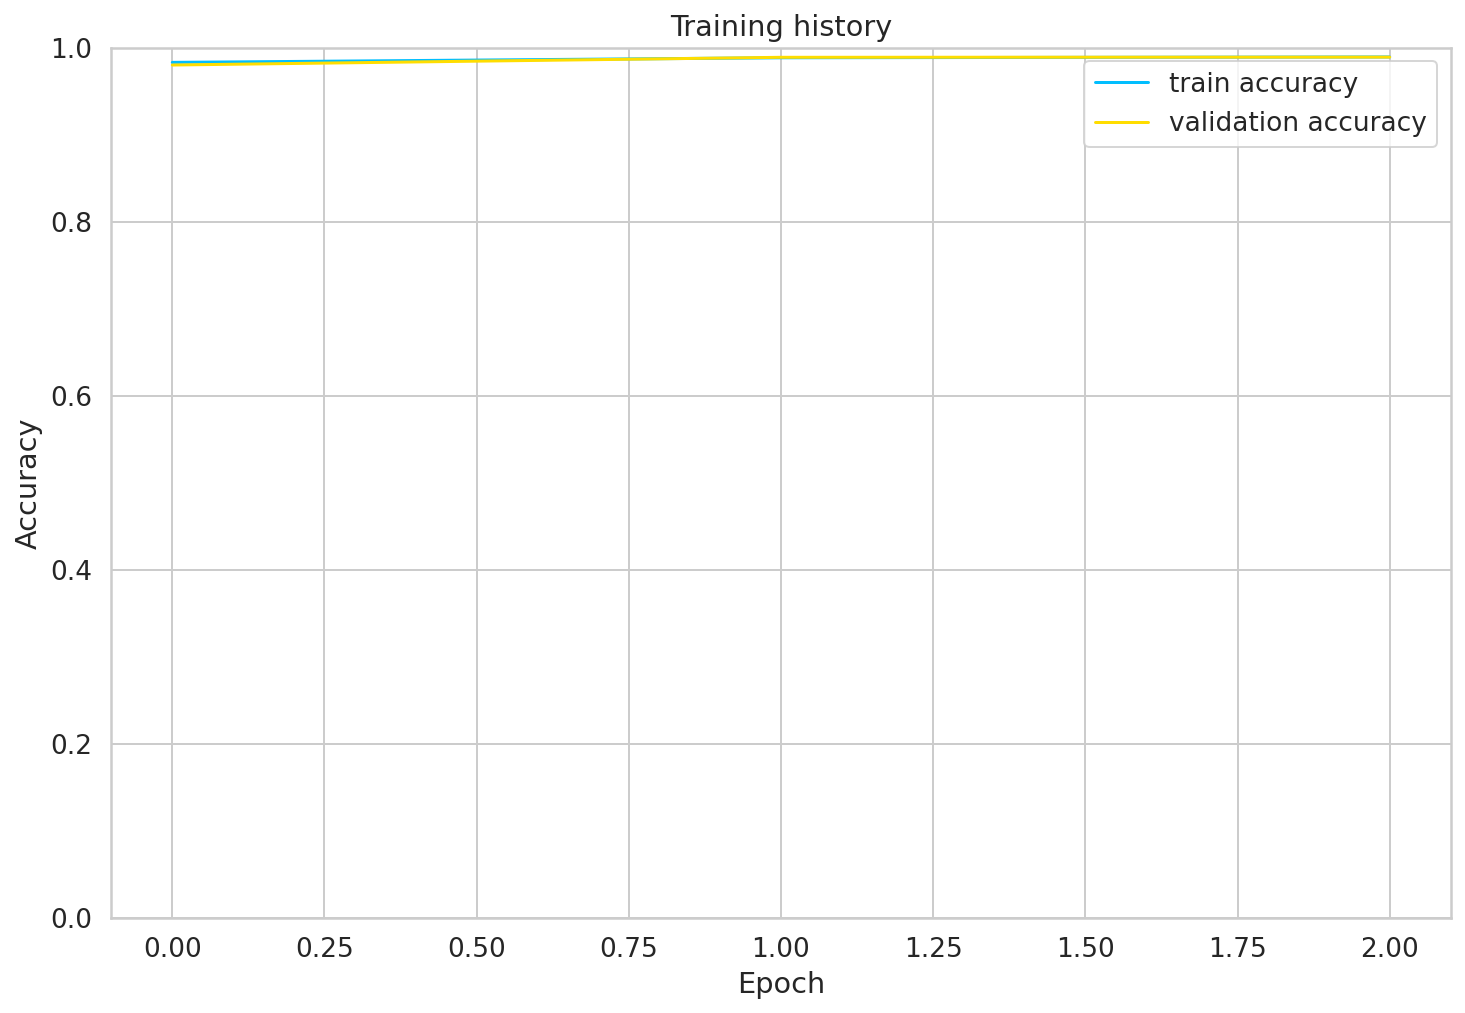

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

## Evaluation

In [ ]:
model.load_state_dict(torch.load("/content/best_model_state.pt", map_location=torch.device('cuda:0')))

<All keys matched successfully>

In [ ]:
!gdown --id '16gzdFgMVnhGfpUaEPlbYdTIdldn_jzYc'

Downloading...
From: https://drive.google.com/uc?id=16gzdFgMVnhGfpUaEPlbYdTIdldn_jzYc
To: /content/K_Fold_1_testfile.csv
100% 88.4M/88.4M [00:02<00:00, 42.8MB/s]


In [ ]:
df_test = pd.read_csv('/content/K_Fold_1_testfile.csv')

In [ ]:
df_test

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,number,opened_at,mir_opened_at,short_description,description,text,status
0,709808,709808,887282,INC14345106,05/08/2020 14:39,NaN,Misdirected Chat- Needs to speak to Agency Sup...,There is a problem with chat. I get to this me...,misdirected chat needs speak agency support pr...,1
1,463123,463123,579196,INC14486860,06/09/2020 15:35,NaN,Call received - Silent call,Call received - Silent call,call received silent call call received silent...,1
2,653784,653784,817155,INC15308915,08/03/2021 07:52,NaN,Allstate Master App Drivewise not recording an...,Customer called to report that Drivewise isn't...,allstate master app drivewise recording trip a...,1
3,800459,800459,175376,INC14710893,23/10/2020 15:27,NaN,Account locked out,Unable to log into MyAccount.,account locked unable log myaccount,1
4,739141,739141,923953,INC13891134,21/04/2020 11:58,NaN,Issues with Verint playback after Windows Alls...,Issue: User cannot play the recordings in veri...,issues verint playback windows allstate update...,1
...,...,...,...,...,...,...,...,...,...,...
287022,456948,456948,571440,INC14149217,23/06/2020 14:06,NaN,Unable to scan from printer/scanner to computer,Unable to scan documents,unable scan printer scanner computer unable sc...,1
287023,102995,102995,128763,INC13986662,15/05/2020 08:28,NaN,Find a Customer - Customer Documents Portlet o...,print endorsements grey,find customer customer documents portlet open ...,1
287024,897145,897145,657012,INC14651049,12/10/2020 13:56,NaN,Allstate Master App Drivewise not recording an...,Customer state he activated drivewise but it's...,allstate master app drivewise recording trip i...,1
287025,175458,175458,219253,INC13520066,20/01/2020 08:55,1/20/2020 14:52,Why am I unable to print from any application?,When trying to print to any printer throughout...,unable print application trying print printer ...,0


In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [ ]:
predictions = []
probs1 = []
probs0 = []
for j,r in df_test.iterrows():
      i = r.description
      if pd.isna(i):
        i = r.short_description
      if pd.isna(i):
        predictions.append('NAN')
        probs1.append(0)
        probs0.append(0)
        continue
      x = tokenizer.encode_plus(
        i,
        add_special_tokens=True,
        max_length=66,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
        )
      input_ids = x["input_ids"].to(device)
      attention_mask = x["attention_mask"].to(device)
      outputs = model(input_ids=input_ids, attention_mask=attention_mask)
      _, preds = torch.max(outputs, dim=1)
      probs1.append(float(outputs[0][1]))
      probs0.append(float(outputs[0][0]))
      predictions.append(float(preds))

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
probs1 = softmax(probs1)
probs0 = softmax(probs0)
predictions2 = [float(x) for x in predictions]

In [ ]:
df_test['status'] = predictions
df_test['probs_0'] = probs0
df_test['probs_1'] = probs1
df_test.to_csv('results.csv')
df_test

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,number,opened_at,mir_opened_at,short_description,description,text,status,probs_0,probs_1
0,709808,709808,887282,INC14345106,05/08/2020 14:39,NaN,Misdirected Chat- Needs to speak to Agency Sup...,There is a problem with chat. I get to this me...,misdirected chat needs speak agency support pr...,1.0,0.000003,0.000003
1,463123,463123,579196,INC14486860,06/09/2020 15:35,NaN,Call received - Silent call,Call received - Silent call,call received silent call call received silent...,1.0,0.000003,0.000003
2,653784,653784,817155,INC15308915,08/03/2021 07:52,NaN,Allstate Master App Drivewise not recording an...,Customer called to report that Drivewise isn't...,allstate master app drivewise recording trip a...,1.0,0.000003,0.000003
3,800459,800459,175376,INC14710893,23/10/2020 15:27,NaN,Account locked out,Unable to log into MyAccount.,account locked unable log myaccount,1.0,0.000003,0.000003
4,739141,739141,923953,INC13891134,21/04/2020 11:58,NaN,Issues with Verint playback after Windows Alls...,Issue: User cannot play the recordings in veri...,issues verint playback windows allstate update...,1.0,0.000003,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...
287022,456948,456948,571440,INC14149217,23/06/2020 14:06,NaN,Unable to scan from printer/scanner to computer,Unable to scan documents,unable scan printer scanner computer unable sc...,1.0,0.000003,0.000003
287023,102995,102995,128763,INC13986662,15/05/2020 08:28,NaN,Find a Customer - Customer Documents Portlet o...,print endorsements grey,find customer customer documents portlet open ...,1.0,0.000003,0.000003
287024,897145,897145,657012,INC14651049,12/10/2020 13:56,NaN,Allstate Master App Drivewise not recording an...,Customer state he activated drivewise but it's...,allstate master app drivewise recording trip i...,1.0,0.000003,0.000003
287025,175458,175458,219253,INC13520066,20/01/2020 08:55,1/20/2020 14:52,Why am I unable to print from any application?,When trying to print to any printer throughout...,unable print application trying print printer ...,1.0,0.000003,0.000003


In [ ]:
df_test.status.value_counts()

1.0    286157
0.0       870
Name: status, dtype: int64

In [ ]:
test_acc, _ = eval_model(
    model,
    test_data_loader,
    loss_fn,
    device,
    len(df_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


0.9938841676081938

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()
    texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            
            texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return texts, predictions, prediction_probs, real_values

In [ ]:
y_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2573
           1       1.00      1.00      1.00     78855

    accuracy                           0.99     81428
   macro avg       0.96      0.94      0.95     81428
weighted avg       0.99      0.99      0.99     81428



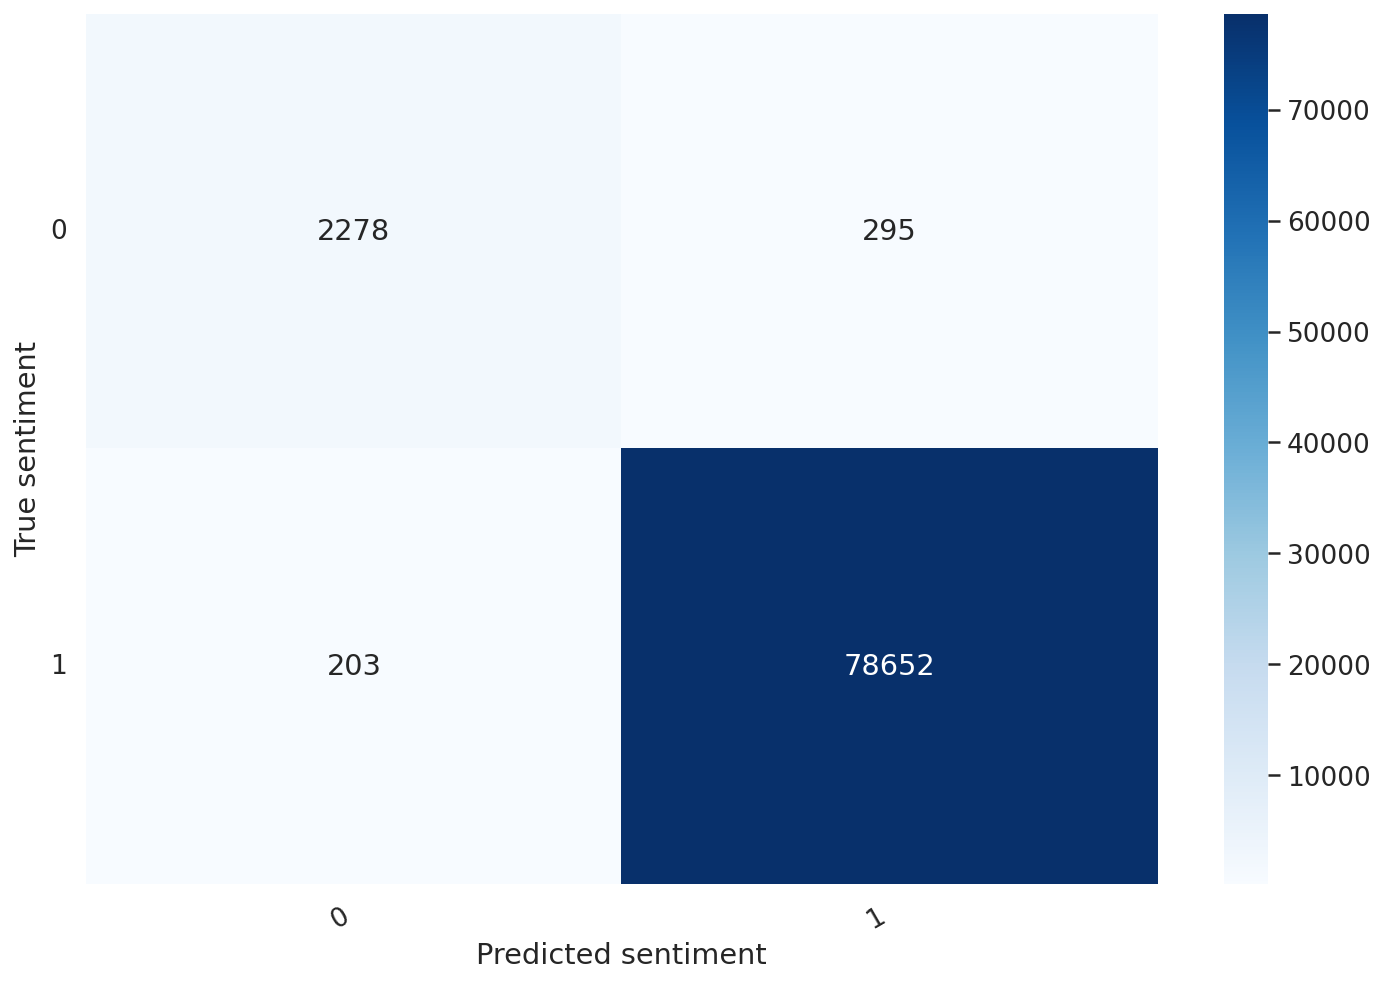

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
y_pred_probs

tensor([[-4.2390,  3.8758],
        [-4.3681,  3.9775],
        [-4.3763,  3.9878],
        ...,
        [-4.3037,  3.9456],
        [-4.2289,  3.9508],
        [-4.1772,  3.8822]])

In [ ]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.9413867488337438

In [ ]:
idx = 2

text = y_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [ ]:
print("\n".join(wrap(text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')

chat received requesting assistance non access issue another user
office agency online supportdisconnected chat

True sentiment: 1


# Costumer Interaction with Stratified K-Fold Cross Val

In [ ]:
import pandas as pd

In [ ]:
!gdown --id '13Ra5qJwduTiHgtadIfPqI5HtIfPf4Dvh'
!gdown --id '1ImwvyEv9slcGD-YQ3Vp0QhjEdl9EmhWb'

Downloading...
From: https://drive.google.com/uc?id=13Ra5qJwduTiHgtadIfPqI5HtIfPf4Dvh
To: /content/dataset2_test.xlsx
100% 3.48M/3.48M [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ImwvyEv9slcGD-YQ3Vp0QhjEdl9EmhWb
To: /content/dataset2_train.xlsx
100% 7.64M/7.64M [00:00<00:00, 119MB/s]


In [ ]:
train1=pd.read_excel("/content/dataset2_test.xlsx")
test1=pd.read_excel('/content/dataset2_train.xlsx')
test1

,Unnamed: 0,number,text,status
0,55190,INC14365851,esignature option available due undermatch cus...,1
1,181195,INC15161383,stop sending e mail return device milewise rec...,1
2,142849,INC14863715,close duplicate incident hi files sent please ...,1
3,155259,INC14033459,needs speak drivewise alliance support custome...,1
4,27636,INC13595088,drivewise trip data recording device customer ...,1
...,...,...,...,...
164782,244199,INC15433607,multiple application unable search slow respon...,0
164783,244221,INC15433254,multiple application eperiencing slow response...,0
164784,244244,INC15133210,receiving file note could created due connecti...,0
164785,244311,INC15133176,receiving application error clicking supportin...,0


In [ ]:
train1 = pd.concat([train1, test1])
train1 = train1.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold

sent=train1['text']
labels=train1['status']
accuracy=[]
ROC=[]
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
X=train1['text']
y=train1['status']

In [ ]:
import tqdm as tqdm
import torch

print(X.shape)

(236576,)


In [ ]:
from numpy import exp
def softmax(vector):
	e = exp(vector)
	return e / e.sum()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification,AutoModel
  
tokenizer = AutoTokenizer.from_pretrained("nghuyong/ernie-2.0-large-en")

model = AutoModelForSequenceClassification.from_pretrained("nghuyong/ernie-2.0-large-en",output_hidden_states=True,num_labels=2)

for train_ix, test_ix in kfold.split(X, y):
  print(train_ix)
  print(test_ix)
  # Tokenize all of the sentences and map the tokens to thier word IDs.
  input_ids = []
  attention_masks = []
  train_X = X[train_ix]
  test_X = X[test_ix]
  test_y = y[test_ix]
  train_y = y[train_ix]
  sentences = train_X.values
  labels = train_y.values
  

  # For every sentence...
  for sent in tqdm.tqdm(sentences):
      # `encode_plus` will:
      #   (1) Tokenize the sentence.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.
      
      #   (5) Pad or truncate the sentence to `max_length`
      #   (6) Create attention masks for [PAD] tokens.
      encoded_dict = tokenizer.encode_plus(
                          sent,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 100 ,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                          truncation=True
                    )
      
      # Add the encoded sentence to the list.    
      input_ids.append(encoded_dict['input_ids'])
      
      # And its attention mask (simply differentiates padding from non-padding).
      attention_masks.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)

  # Print sentence 0, now as a list of IDs.
  print('Original: ', sentences[0])
  print('Token IDs:', input_ids[0])

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at nghuyong/ernie-2.0-large-en were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nghuyong/ernie-2.

[     0      1      2 ... 236572 236574 236575]
[    35     37     38 ... 236560 236567 236573]


  0%|          | 0/212918 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 212918/212918 [01:18<00:00, 2717.38it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      2      3 ... 236573 236574 236575]
[     1     11     17 ... 236530 236562 236570]


100%|██████████| 212918/212918 [01:12<00:00, 2946.08it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      1      2 ... 236573 236574 236575]
[     4      9     14 ... 236549 236556 236571]


100%|██████████| 212918/212918 [01:09<00:00, 3071.46it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      1      2 ... 236571 236573 236575]
[     6     18     19 ... 236564 236572 236574]


100%|██████████| 212918/212918 [01:08<00:00, 3125.41it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      1      2 ... 236573 236574 236575]
[    12     15     24 ... 236528 236531 236559]


100%|██████████| 212918/212918 [01:07<00:00, 3132.45it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     1      3      4 ... 236573 236574 236575]
[     0      2      5 ... 236558 236563 236569]


100%|██████████| 212918/212918 [01:08<00:00, 3127.67it/s]


Original:  misdirected chat needs speak agency support question smart student discount
Token IDs: tensor([  101, 28616,  4305,  2890, 10985, 11834,  3791,  3713,  4034,  2490,
         3160,  6047,  3076, 19575,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      1      2 ... 236573 236574 236575]
[    30     57     76 ... 236502 236518 236541]


100%|██████████| 212919/212919 [01:07<00:00, 3149.35it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      1      2 ... 236573 236574 236575]
[     7     13     43 ... 236555 236557 236568]


100%|██████████| 212919/212919 [01:07<00:00, 3171.42it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      1      2 ... 236572 236573 236574]
[     3     16     82 ... 236551 236565 236575]


100%|██████████| 212919/212919 [01:07<00:00, 3172.01it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
[     0      1      2 ... 236573 236574 236575]
[    21     22     26 ... 236511 236540 236566]


100%|██████████| 212919/212919 [01:06<00:00, 3190.23it/s]


Original:  enrolled drivewise mobile still showing enrolled device program information dst showing inaccurate
Token IDs: tensor([  101,  8302,  3298, 14244,  4684,  2145,  4760,  8302,  5080,  2565,
         2592, 16233,  2102,  4760, 24949,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [ ]:
  from torch.utils.data import TensorDataset, random_split
  dataset = TensorDataset(input_ids, attention_masks, labels)
  train_size = int(len(dataset))
  print('{:>5,} training samples'.format(train_size))
  from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
  batch_size =16
  train_dataloader = DataLoader(
              dataset,  # The training samples.
              batch_size = batch_size # Trains with this batch size.
          )
  

212,919 training samples


In [ ]:
  from transformers import AdamW
  optimizer = AdamW(model.parameters(),
                    lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                    eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                  )

In [ ]:
  from transformers import get_linear_schedule_with_warmup
  epochs = 1
  total_steps = len(train_dataloader) * epochs
  scheduler = get_linear_schedule_with_warmup(optimizer, 
                                              num_warmup_steps = 0, # Default value in run_glue.py
                                              num_training_steps = total_steps)

In [ ]:
  import numpy as np

  # Function to calculate the accuracy of our predictions vs labels
  def flat_accuracy(preds, labels):
      pred_flat = np.argmax(preds, axis=1).flatten()
      labels_flat = labels.flatten()
      return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
  import torch

  # If there's a GPU available...
  if torch.cuda.is_available():    

      # Tell PyTorch to use the GPU.    
      device = torch.device("cuda")

      print('There are %d GPU(s) available.' % torch.cuda.device_count())

      print('We will use the GPU:', torch.cuda.get_device_name(0))

  # If not...
  else:
      print('No GPU available, using the CPU instead.')
      device = torch.device("cpu")
  

  model.cuda()

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(4, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1

In [ ]:
  import random
  import numpy as np
  import time 
  # This training code is based on the `run_glue.py` script here:
  # https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

  # Set the seed value all over the place to make this reproducible.
  seed_val = 100

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  # We'll store a number of quantities such as training and validation loss, 
  # validation accuracy, and timings.
  training_stats = []

  # Measure the total training time for the whole run.
  total_t0 = time.time()

  # For each epoch...
  for epoch_i in range(0, epochs):
      
      # ========================================
      #               Training
      # ========================================
      
      # Perform one full pass over the training set.

      print("")
      print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
      print('Training...')

      # Measure how long the training epoch takes.
      t0 = time.time()

      # Reset the total loss for this epoch.
      total_train_loss = 0
      total_eval_accuracy=0
      model.train()
      for step, batch in enumerate(train_dataloader):
          if step % 1000 == 0 and not step == 0:
              elapsed = time.time() - t0
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)
          model.zero_grad()        
          outputs = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask, 
                              labels=b_labels)
          loss = outputs[0]
          logits = outputs[1].detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()
          total_train_loss += loss.item()
          total_eval_accuracy += flat_accuracy(logits, label_ids)
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
          optimizer.step()

          # Update the learning rate.
          scheduler.step()

      # # Calculate the average loss over all of the batches.
      avg_train_loss = total_train_loss / len(train_dataloader)            
      avg_train_accuracy = total_eval_accuracy / len(train_dataloader)
      print(avg_train_loss)
      print(avg_train_accuracy)
      # Measure how long this epoch took.
      training_time = time.time() - t0

      print("")
      # print("  Average training loss: {0:.2f}".format(avg_train_loss))
      print("  Training epoch took: {:}".format(training_time))
      training_stats.append(
          {
              'epoch': epoch_i + 1,
              'Training Loss': avg_train_loss,
              # 'Valid. Loss': avg_val_loss,
              'Valid. Accur.': avg_train_accuracy,
              # 'Training Time': training_time,
              # 'Validation Time': validation_time
          }
      )

  print("")
  print("Training complete!")


======== Epoch 1 / 1 ========
Training...
  Batch 1,000  of  13,308.    Elapsed: 539.6458835601807.
  Batch 2,000  of  13,308.    Elapsed: 1078.8886470794678.
  Batch 3,000  of  13,308.    Elapsed: 1618.1959006786346.
  Batch 4,000  of  13,308.    Elapsed: 2157.3273084163666.
  Batch 5,000  of  13,308.    Elapsed: 2696.8777360916138.
  Batch 6,000  of  13,308.    Elapsed: 3235.987439393997.
  Batch 7,000  of  13,308.    Elapsed: 3775.466315507889.
  Batch 8,000  of  13,308.    Elapsed: 4315.296773433685.
  Batch 9,000  of  13,308.    Elapsed: 4854.910382986069.
  Batch 10,000  of  13,308.    Elapsed: 5394.279388427734.
  Batch 11,000  of  13,308.    Elapsed: 5933.777212142944.
  Batch 12,000  of  13,308.    Elapsed: 6473.311372280121.
  Batch 13,000  of  13,308.    Elapsed: 7012.840447664261.
0.01642875606804405
0.9972666816952209

  Training epoch took: 7178.6652064323425

Training complete!


In [ ]:
  sentences2 = test_X.values
  input_ids = []
  attention_masks = []

  for sent in tqdm.tqdm(sentences2):
      # `encode_plus` will:
      #   (1) Tokenize the sentence.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.
      #   (5) Pad or truncate the sentence to `max_length`
      #   (6) Create attention masks for [PAD] tokens.
      encoded_dict = tokenizer.encode_plus(
                          sent,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 100,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
      
      # Add the encoded sentence to the list.    
      input_ids.append(encoded_dict['input_ids'])
      
      # And its attention mask (simply differentiates padding from non-padding).
      attention_masks.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)


  batch_size = 64

  # Create the DataLoader.
  prediction_data = TensorDataset(input_ids, attention_masks)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)


  model.eval()

  0%|          | 0/23657 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 23657/23657 [02:24<00:00, 163.44it/s]


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(4, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1

In [ ]:
  predictions= []

  # Predict 
  for batch in tqdm.tqdm(prediction_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask = batch
    
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, 
                        attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    
    # Store predictions and true labels
    predictions.append(logits)

  print('    DONE.')

  res=[]
  for val in predictions:
    for m in val:
      temp=softmax(m)
      # print(temp)
      u=np.argmax(temp)
      res.append(u)

  
  r=pd.DataFrame(res)


100%|██████████| 370/370 [03:47<00:00,  1.63it/s]


    DONE.


In [ ]:
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import f1_score
  #accuracy_score(r,test_y) 
  accuracy.append(accuracy_score(r,test_y))
  print('Accuracy:   ',accuracy_score(r,test_y))
  print('f1score:  ',f1_score(test_y, r,average='weighted'))

Accuracy:    0.08120218117259162
f1score:   0.012197153024673432


In [ ]:
  from sklearn.metrics import roc_auc_score
  try:
    print('ROC_score:  ',roc_auc_score(test_y,r))	
    # ROC.append(roc_auc_score(test_y,r,average='micro'))
  except ValueError:
    print("Error")
    pass

ROC_score:   0.5
